# Customer Clustering with KMeans to Boost Business Strategy
In this notebook it will be showned how to use the KMeans algorithm to cluster customer data.


In [1]:
## Installing Required Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D


### Exploring the data

In [2]:
#Loading the data in a csv file into a dataframe.
df_sst = pd.read_csv('Wholesale customers data.csv')

#First five rows is showned
df_sst.head(5)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
#Showing the shape of the dataset.
df_sst.shape

(440, 8)

array([[<AxesSubplot:title={'center':'Channel'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'Fresh'}>],
       [<AxesSubplot:title={'center':'Milk'}>,
        <AxesSubplot:title={'center':'Grocery'}>,
        <AxesSubplot:title={'center':'Frozen'}>],
       [<AxesSubplot:title={'center':'Detergents_Paper'}>,
        <AxesSubplot:title={'center':'Delicassen'}>, <AxesSubplot:>]],
      dtype=object)

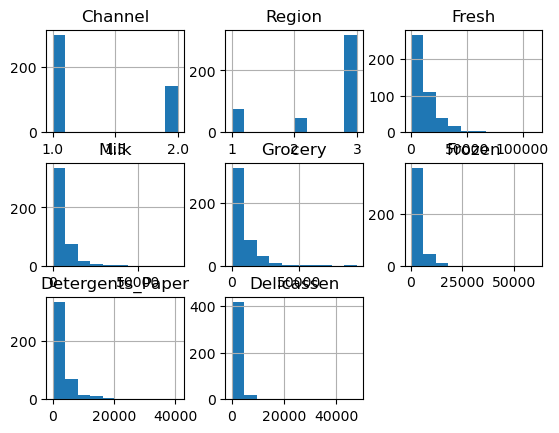

In [4]:
#Plotting the data into histograms.
df_sst.hist()

### Deciding how many clusters to create

In [5]:
number_of_clusters = 4

In [6]:
#Create a KMeans clustering model.
cluster = KMeans(n_clusters = number_of_clusters)

#Determing the value of the parameter 'n_init' for future changes 
kmeans = KMeans(n_init='auto')

In [7]:
#Training the model. 
result = cluster.fit_transform(df_sst)

/home/andy/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
#Cluster centers are printed.
cluster.cluster_centers_

array([[1.86315789e+00, 2.53684211e+00, 4.80884211e+03, 1.05250105e+04,
        1.69097895e+04, 1.46258947e+03, 7.30240000e+03, 1.65088421e+03],
       [1.13793103e+00, 2.58620690e+00, 3.61444828e+04, 5.47146552e+03,
        6.12879310e+03, 6.29865517e+03, 1.06400000e+03, 2.31672414e+03],
       [1.15217391e+00, 2.53623188e+00, 9.08746377e+03, 3.02742754e+03,
        3.75351449e+03, 2.81798551e+03, 1.00300362e+03, 1.04052536e+03],
       [1.90909091e+00, 2.54545455e+00, 1.98882727e+04, 3.61423636e+04,
        4.55174545e+04, 6.32890909e+03, 2.14170909e+04, 8.41400000e+03]])

### Making Predictions

In [9]:
#Ckecking columns name.
df_sst.columns.tolist()

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

In [10]:
#Making predictions and saving them into the column "cluster_number".
df_sst['cluster_number'] = cluster.predict(df_sst)
df_sst.sample(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_number
60,2,3,8590,3045,7854,96,4095,225,2
90,1,3,11405,596,1638,3347,69,360,2
168,1,3,5809,735,803,1393,79,429,2
368,1,3,22335,1196,2406,2046,101,558,2
12,2,3,31714,12319,11757,287,3881,2931,1


In [11]:
#Printing the cluster numbers and the number of customers in each cluster.
df_sst.cluster_number.value_counts()

cluster_number
2    276
0     95
1     58
3     11
Name: count, dtype: int64

In [12]:
# Generate sample data for clustering
X, y = make_blobs(n_samples=440, 
                  centers=4, 
                  cluster_std=0.6, 
                  random_state=0)

In [13]:
# Apply k-means clustering
cluster.fit(X)

/home/andy/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

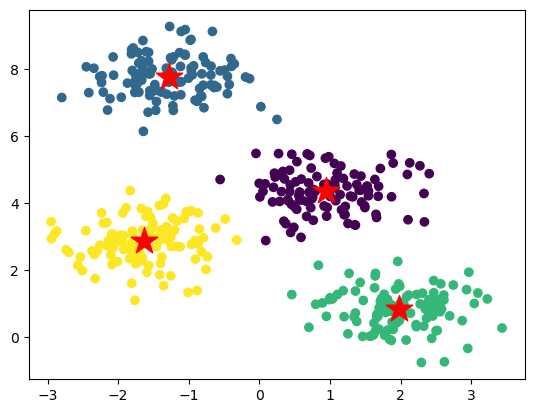

In [14]:
# Plotting the clusters and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_, cmap='viridis')
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], marker='*', s=400, color='r')
plt.show()

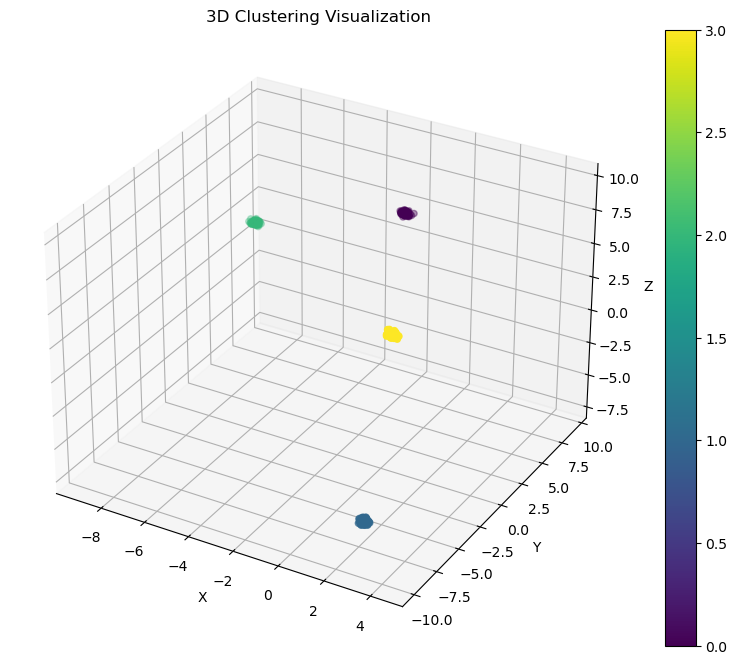

In [15]:
#Bonus: plotting cluster in 3D
X, y = make_blobs(n_samples=440,
                n_features= 3,
                 centers=4, 
                 cluster_std=0.1, 
                 random_state=42)

#Creating 3D scatter plot
fig = plt. figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

#Plotting the points
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2],
                     c=y,
                     cmap='viridis'
                     )

#Adding labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Clustering Visualization')

#Adding a color bar
plt.colorbar(scatter)

#Showing the plot
plt.show()
